In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change the working directory to the desired folder
import os
os.chdir('/content/drive/My Drive/PPS')

# Verify the current working directory
print("Current working directory:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/PPS


In [2]:
#!pip install tensorflow==2.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 41.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-ser

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
#define the file
file_path = "/content/drive/My Drive/PPS/fraud_data.csv"

#load the datasets
df = pd.read_csv(file_path)

In [5]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [7]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1844
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


In [8]:
#drop the value of 'is_fraud' if it's not 1 or 0
df=df[df['is_fraud'].isin(['0', '1'])]

In [9]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1844


In [10]:
#feature engineering
#creating age category
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="mixed")

df['dob'] = pd.to_datetime(df['dob'], format="mixed")
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


In [11]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,80
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,80
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,80
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,80
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,80


In [12]:
def binarize(value):
    if 18 <= value <= 25:
        return '18-25'
    elif 26 <= value <= 35:
        return '26-35'
    elif 36 <= value <= 49:
        return '36-49'
    elif 50 <= value <= 69:
        return '50-69'
    else:
        return '70-90'
df['age'] = df['age'].apply(binarize)

In [13]:
df['age'].unique()

array(['70-90', '50-69', '36-49', '26-35', '18-25'], dtype=object)

In [14]:
#creating time_category
def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the DataFrame
df['time_category'] = df['trans_date_trans_time'].dt.time.apply(categorize_time)

In [15]:
df['time_category'].unique()

array(['Night', 'Day', 'Morning', 'Evening'], dtype=object)

In [16]:
#Extracting day of the week.
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

In [17]:
df['day_of_week'].unique()

array(['Monday', 'Wednesday', 'Saturday', 'Sunday', 'Tuesday', 'Thursday',
       'Friday'], dtype=object)

In [18]:
df['day_of_week'].head()

,day_of_week
0,Monday
1,Monday
2,Monday
3,Monday
4,Monday


In [19]:
#Creating job categories.
def job_categories(profession):
    profession_lower = profession.lower()

    # Education, Training, and Research
    if any(keyword in profession_lower for keyword in [
        'administrator, education', 'lecturer', 'teacher', 'professor', 'telecommunications researcher',
        'research scientist', 'education officer', 'learning mentor', 'teaching laboratory technician',
        'special educational needs', 'research officer', 'science writer', 'education administrator']):
        return 'Education, Training, and Research'
    # Healthcare, Therapy, and Well-being
    elif any(keyword in profession_lower for keyword in [
        'nurse', 'therapist', 'psychologist', 'counsellor', 'pharmacist', 'osteopath', 'chiropodist',
        'health', 'clinical', 'physiotherapist', 'medical', 'audiological', 'exercise physiologist',
        'music therapist', 'occupational therapist', 'podiatrist', 'occupational hygienist']):
        return 'Healthcare, Therapy, and Well-being'
    # Science, Engineering, and Technology
    elif any(keyword in profession_lower for keyword in [
        'cytogeneticist', 'scientist', 'engineer', 'geoscientist', 'geologist',
        'cartographer', 'soil scientist', 'water engineer', 'systems developer']):
        return 'Science, Engineering, and Technology'
    # Business, Finance, and Law
    elif any(keyword in profession_lower for keyword in [
        'solicitor', 'legal', 'accountant', 'tax inspector', 'investment banker', 'economist',
        'investment analyst', 'comptroller', 'financial', 'officer', 'sales', 'retail merchandiser',
        'manager', 'chief marketing officer', 'marketing executive', 'public relations', 'futures trader',
        'clothing/textile technologist', 'insurance broker', 'advertising account planner']):
        return 'Business, Finance, and Law'
    # Creative Arts, Design, and Media
    elif any(keyword in profession_lower for keyword in [
        'artist', 'set designer', 'web designer', 'glass blower', 'fashion designer', 'community arts worker',
        'editor', 'journalist', 'video editor', 'musician', 'commissioning editor',
        'television', 'radio', 'media', 'production', 'designer', 'features editor']):
        return 'Creative Arts, Design, and Media'
    # Construction, Planning, and Environment
    elif any(keyword in profession_lower for keyword in [
        'architect', 'landscape architect', 'building surveyor', 'town planner',
        'planning and development', 'minerals surveyor', 'civil engineer',
        'historic buildings inspector', 'petroleum engineer', 'construction', 'surveyor, minerals',
        'land/geomatics surveyor', 'buyer, industrial', 'surveyor, land/geomatics', 'contractor',
        'surveyor, mining', 'metallurgist']):
        return 'Construction, Planning, and Environment'
    # Public Sector, Civil Service, and Government
    elif any(keyword in profession_lower for keyword in [
        'civil service', 'local government officer', 'immigration officer',
        'armed forces', 'charity officer', 'international aid', 'police', 'firefighter',
        'intelligence analyst', 'public librarian', 'administrator, local government']):
        return 'Public Sector, Civil Service, and Government'
    # IT and Information Systems
    elif any(keyword in profession_lower for keyword in [
        'network engineer', 'systems analyst', 'information officer', 'it consultant',
        'information systems manager', 'developer']):
        return 'IT and Information Systems'
    # Pilot
    elif any(keyword in profession_lower for keyword in [
        'airline pilot', 'pilot, airline']):
        return 'Pilot'

    # Other
    else:
        return 'Other'

# Apply the function to the column 'job'
df['professions'] = df['job'].apply(job_categories)

In [20]:
#extracting month data from trans_date_trans_time
df['month'] = df['trans_date_trans_time'].dt.month_name()

In [21]:
df['month'].head()

,month
0,April
1,April
2,April
3,April
4,April


In [22]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'time_category', 'day_of_week',
       'professions', 'month'],
      dtype='object')

In [23]:
#drop unwanted columns
df=df.drop(['trans_date_trans_time', 'merchant', 'state', 'city',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long' ], axis=1)

In [24]:
df.head()

,category,amt,is_fraud,age,time_category,day_of_week,professions,month
0,grocery_net,14.37,1,70-90,Night,Monday,"Education, Training, and Research",April
1,shopping_net,966.11,1,70-90,Day,Monday,"Education, Training, and Research",April
2,misc_pos,49.61,1,70-90,Night,Monday,"Education, Training, and Research",April
3,grocery_pos,295.26,1,70-90,Night,Monday,"Education, Training, and Research",April
4,health_fitness,18.17,1,70-90,Night,Monday,"Education, Training, and Research",April


In [25]:
data=df

In [26]:
data.dtypes

,0
category,object
amt,float64
is_fraud,object
age,object
time_category,object
day_of_week,object
professions,object
month,object


In [27]:
#handle categorical variables
label_encoders={}
categorical_cols=['category', 'age', 'day_of_week', 'professions', 'month', 'time_category']
for col in categorical_cols:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  label_encoders[col]=le

In [28]:
#Split the data into X and y
X = data.drop('is_fraud', axis=1)  # Features
y = data['is_fraud']  # Target

In [29]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
#SMOTE to handle imbalance dataset
from imblearn.over_sampling import SMOTE

#Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [31]:
from sklearn.preprocessing import StandardScaler

#Scale the data (fit scaler on training data and use the same scaler on test data)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [33]:
import numpy as np

# Ensure data types are numeric
X_train_smote_scaled = X_train_smote_scaled.astype(np.float64)
y_train_smote = y_train_smote.astype(np.float64)
X_test_scaled = X_test_scaled.astype(np.float64)
y_test = y_test.astype(np.float64)

# Print data types to confirm
print(X_train_smote_scaled.dtype, y_train_smote.dtype)
print(X_test_scaled.dtype, y_test.dtype)


float64 float64
float64 float64


In [39]:
#Build and train your model
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_smote_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_smote_scaled, y_train_smote, epochs=50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
630/630 [==============================] - 2s 2ms/step - loss: 0.3732 - accuracy: 0.8331 - val_loss: 0.2699 - val_accuracy: 0.9055
Epoch 2/50
630/630 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.8627 - val_loss: 0.2996 - val_accuracy: 0.8865
Epoch 3/50
630/630 [==============================] - 1s 2ms/step - loss: 0.2971 - accuracy: 0.8706 - val_loss: 0.2603 - val_accuracy: 0.9093
Epoch 4/50
630/630 [==============================] - 1s 2ms/step - loss: 0.2819 - accuracy: 0.8794 - val_loss: 0.2759 - val_accuracy: 0.9052
Epoch 5/50
630/630 [==============================] - 1s 2ms/step - loss: 0.2631 - accuracy: 0.8894 - val_loss: 0.2376 - val_accuracy: 0.9238
Epoch 6/50
630/630 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.8966 - val_loss: 0.2461 - val_accuracy: 0.9103
Epoch 7/50
630/630 [==============================] - 1s 2ms/step - loss: 0.2325 - accuracy: 0.9047 - val_loss: 0.2056 - val_accuracy: 0.9308
Epoch 

In [40]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.35).astype(int)

91/91 [==============================] - 0s 908us/step


In [41]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Step 12: Predict on the test data (get probabilities)
y_pred_prob = model.predict(X_test_scaled)

# Step 13: Adjust the threshold for better fraud detection
threshold = 0.8  # Experiment with this value
y_pred = (y_pred_prob > threshold).astype(int)

# Step 14: Evaluate the model using AUC, F1, and accuracy
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 15: Display results
print(f"Best Threshold: {threshold}, Best F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(classification_rep)

91/91 [==============================] - 0s 1ms/step
Best Threshold: 0.8, Best F1 Score: 0.8590250329380764
ROC-AUC Score: 0.97
Accuracy: 0.96
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2520
         1.0       0.84      0.88      0.86       369

    accuracy                           0.96      2889
   macro avg       0.91      0.93      0.92      2889
weighted avg       0.96      0.96      0.96      2889



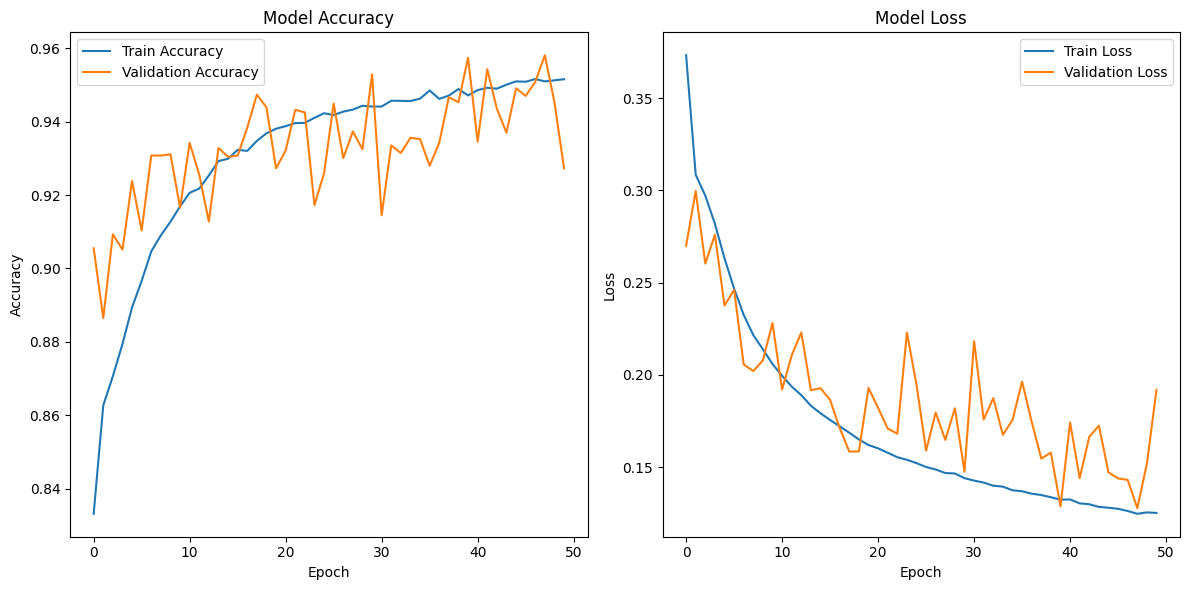

In [42]:
import matplotlib.pyplot as plt

# Assuming `history` is the result of your model.fit() call
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [44]:
# Save the model as an .h5 file
model.save('fraud_detection_model.h5')